## Plot the OOB error trace for randomized tree ensembles

This example demonstrates how to generate a plot of the OOB error rate vs. the number of estimators (`n_estimators`) during the training of randomised tree ensembles in the `sklearn.ensemble` module.

### Credit

- See issue [#4273](https://github.com/scikit-learn/scikit-learn/issues/4273) of the [scikit-learn github repository](https://github.com/scikit-learn/scikit-learn).

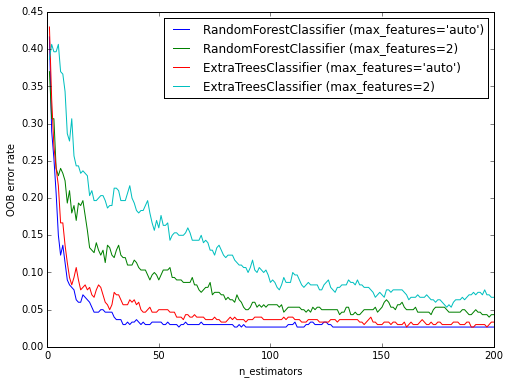

In [80]:
%matplotlib inline

import pylab
import sklearn
import numpy

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

RANDOM_STATE = 12345

# Generate a binary classification dataset. 
N_SAMPLES = 300
N_FEATURES = 50

X, y = make_classification(n_samples=N_SAMPLES, n_features=N_FEATURES, 
                           random_state=RANDOM_STATE)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for paralellised ensembles but is necessary for tracking the OOB
# error trajectory during training.
clfs = [
    ("RandomForestClassifier (max_features='auto')",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="auto",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier (max_features=2)",
        RandomForestClassifier(warm_start=True, max_features=2, 
                               oob_score=True, random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier (max_features='auto')",
        ExtraTreesClassifier(warm_start=True, max_features="auto",
                             oob_score=True, bootstrap=True,
                             random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier (max_features=2)",
        ExtraTreesClassifier(warm_start=True, max_features=2,
                             oob_score=True, bootstrap=True,
                             random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in clfs)

# Max no. of estimators to use in each ensemble.
n_estimators = 200

for label, clf in clfs:
    for i in range(1, n_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)
        
        # Record the <error rate> for each <n_estimators> setting. 
        error_rate[label].append((i, 1 - clf.oob_score_))
    
# Generate the "OOB error rate" vs. "no. of estimators" plot
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    pylab.plot(xs, ys, label=label)
    
pylab.xlabel("n_estimators")
pylab.ylabel("OOB error rate")
pylab.legend(loc="upper right")
pylab.gcf().set_size_inches(8, 6)
pylab.show()